## Strategies to Determine the Number of Clusters (K)


In [1]:
# elbow technique in knn 
# by that we will set correct k values (no of cluster)
# Elbow Method:

# Plot the sum of squared distances (inertia) against the number of clusters. Look for the "elbow point" where the rate of decrease sharply slows down.
# Silhouette Score:

# Calculate the silhouette coefficient for different values of K. The optimal K is the one that maximizes the average silhouette score.
# Gap Statistic:

# Compare the total within-cluster variation for different K values with their expected values under null reference distribution.
# Cross-validation:

# Use cross-validation techniques to evaluate the clustering performance for different K values.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("Mall_Customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
data1 = data.drop("CustomerID",axis = 1)
print(data1)

     Gender  Age  Annual Income (k$)  Spending Score (1-100)
0      Male   19                  15                      39
1      Male   21                  15                      81
2    Female   20                  16                       6
3    Female   23                  16                      77
4    Female   31                  17                      40
..      ...  ...                 ...                     ...
195  Female   35                 120                      79
196  Female   45                 126                      28
197    Male   32                 126                      74
198    Male   32                 137                      18
199    Male   30                 137                      83

[200 rows x 4 columns]


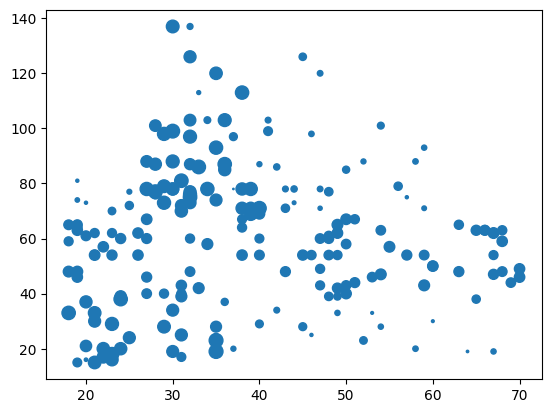

In [7]:
plt.scatter(data["Age"],data["Annual Income (k$)"],data["Spending Score (1-100)"])

In [8]:
data1 = data.drop("Gender",axis =1)
data1
data1 = data1.drop("CustomerID",axis =1)
data1

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [9]:
pip install scikit-learn


  Using cached numpy-1.24.4-cp310-cp310-win_amd64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp310-cp310-win_amd64.whl (14.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.0
    Uninstalling numpy-1.25.0:
      Successfully uninstalled numpy-1.25.0
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.


In [10]:
pip install --upgrade numpy==1.25.0


  Using cached numpy-1.25.0-cp310-cp310-win_amd64.whl.metadata (5.7 kB)
Using cached numpy-1.25.0-cp310-cp310-win_amd64.whl (15.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.9.0 requires numpy<1.25.0,>=1.18.5, but you have numpy 1.25.0 which is incompatible.


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
income_scaler = MinMaxScaler()
spending_scaler = MinMaxScaler()
data1["Annual Income (k$)"] = income_scaler.fit_transform(data1[["Annual Income (k$)"]])
data1["Spending Score (1-100)"] = spending_scaler.fit_transform(data1[["Spending Score (1-100)"]])
print(data1) 

data1 = pd.DataFrame(data1)
data1

c:\Users\odeti akhil reddy\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


     Age  Annual Income (k$)  Spending Score (1-100)
0     19            0.000000                0.387755
1     21            0.000000                0.816327
2     20            0.008197                0.051020
3     23            0.008197                0.775510
4     31            0.016393                0.397959
..   ...                 ...                     ...
195   35            0.860656                0.795918
196   45            0.909836                0.275510
197   32            0.909836                0.744898
198   32            1.000000                0.173469
199   30            1.000000                0.836735

[200 rows x 3 columns]


,Age,Annual Income (k$),Spending Score (1-100)
0,19,0.000000,0.387755
1,21,0.000000,0.816327
2,20,0.008197,0.051020
3,23,0.008197,0.775510
4,31,0.016393,0.397959
...,...,...,...
195,35,0.860656,0.795918
196,45,0.909836,0.275510
197,32,0.909836,0.744898
198,32,1.000000,0.173469


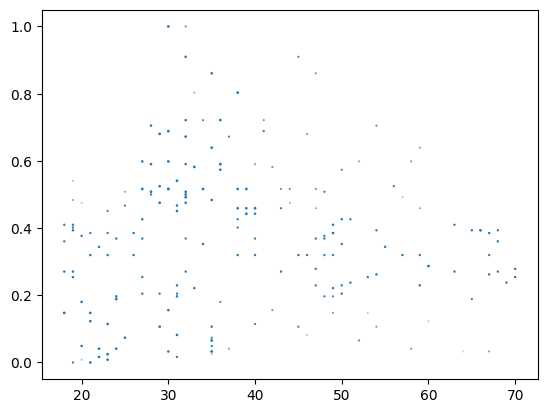

In [12]:
plt.scatter(data1["Age"],data1["Annual Income (k$)"],data1["Spending Score (1-100)"])

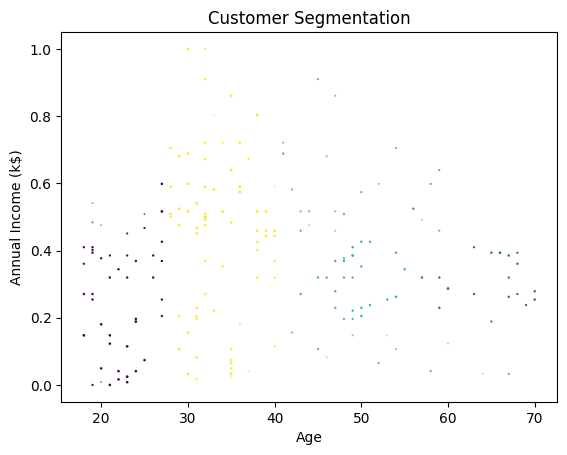

In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
data1['Cluster'] = kmeans.fit_predict(data1[["Age", "Annual Income (k$)", "Spending Score (1-100)"]])

# Plotting
plt.scatter(data["Age"], data1["Annual Income (k$)"], c=data1['Cluster'], s=data1["Spending Score (1-100)"], cmap='viridis')
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.title("Customer Segmentation")
plt.show()

In [14]:
data1

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,0.000000,0.387755,0
1,21,0.000000,0.816327,0
2,20,0.008197,0.051020,0
3,23,0.008197,0.775510,0
4,31,0.016393,0.397959,3
...,...,...,...,...
195,35,0.860656,0.795918,3
196,45,0.909836,0.275510,2
197,32,0.909836,0.744898,3
198,32,1.000000,0.173469,3


In [15]:
data1 = data1.drop("Cluster",axis=1)

In [16]:
data1

,Age,Annual Income (k$),Spending Score (1-100)
0,19,0.000000,0.387755
1,21,0.000000,0.816327
2,20,0.008197,0.051020
3,23,0.008197,0.775510
4,31,0.016393,0.397959
...,...,...,...
195,35,0.860656,0.795918
196,45,0.909836,0.275510
197,32,0.909836,0.744898
198,32,1.000000,0.173469


In [17]:
data1

,Age,Annual Income (k$),Spending Score (1-100)
0,19,0.000000,0.387755
1,21,0.000000,0.816327
2,20,0.008197,0.051020
3,23,0.008197,0.775510
4,31,0.016393,0.397959
...,...,...,...
195,35,0.860656,0.795918
196,45,0.909836,0.275510
197,32,0.909836,0.744898
198,32,1.000000,0.173469


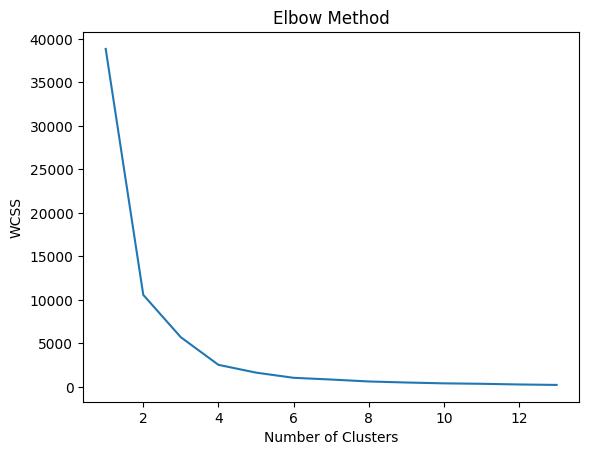

In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate WCSS for different number of clusters
wcss = []
for i in range(1, 14):
    kmeans = KMeans(n_clusters=i, init='k-means++',  random_state=0)
    kmeans.fit(data1)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.plot(range(1, 14), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
clusterer = KMeans(n_clusters =6,random_state = 10)
cluster_labels = clusterer.fit_predict(data1)
cluster_labels

array([3, 3, 3, 3, 1, 3, 5, 3, 2, 1, 2, 5, 2, 3, 5, 3, 5, 3, 0, 5, 5, 3,
       0, 1, 0, 1, 4, 5, 4, 3, 2, 3, 0, 3, 0, 3, 4, 1, 5, 3, 2, 3, 0, 1,
       0, 3, 0, 1, 1, 1, 0, 5, 1, 2, 0, 0, 0, 2, 1, 0, 2, 3, 2, 0, 2, 3,
       4, 2, 3, 1, 2, 0, 2, 2, 2, 1, 4, 4, 3, 0, 2, 5, 2, 0, 3, 0, 0, 3,
       5, 0, 2, 3, 0, 4, 1, 3, 0, 1, 0, 3, 3, 0, 2, 1, 0, 3, 2, 0, 2, 2,
       2, 3, 5, 3, 3, 3, 2, 0, 0, 0, 1, 5, 4, 4, 3, 1, 4, 4, 2, 5, 0, 4,
       3, 1, 3, 1, 4, 1, 3, 5, 2, 1, 1, 1, 3, 1, 0, 1, 5, 5, 4, 4, 4, 5,
       0, 1, 5, 1, 5, 1, 0, 1, 3, 1, 0, 5, 4, 5, 5, 1, 4, 1, 5, 5, 0, 1,
       2, 1, 2, 5, 5, 1, 0, 1, 4, 1, 0, 1, 4, 5, 5, 1, 5, 5, 0, 5, 4, 1,
       1, 1])

For n_clusters = 2, the average silhouette_score is : 0.6305296648067138
For n_clusters = 3, the average silhouette_score is : 0.5714287682025684
For n_clusters = 4, the average silhouette_score is : 0.5947923381109399
For n_clusters = 5, the average silhouette_score is : 0.5751220688794202
For n_clusters = 6, the average silhouette_score is : 0.5613962044646648
For n_clusters = 7, the average silhouette_score is : 0.5797680964354851
For n_clusters = 8, the average silhouette_score is : 0.5605662719737251


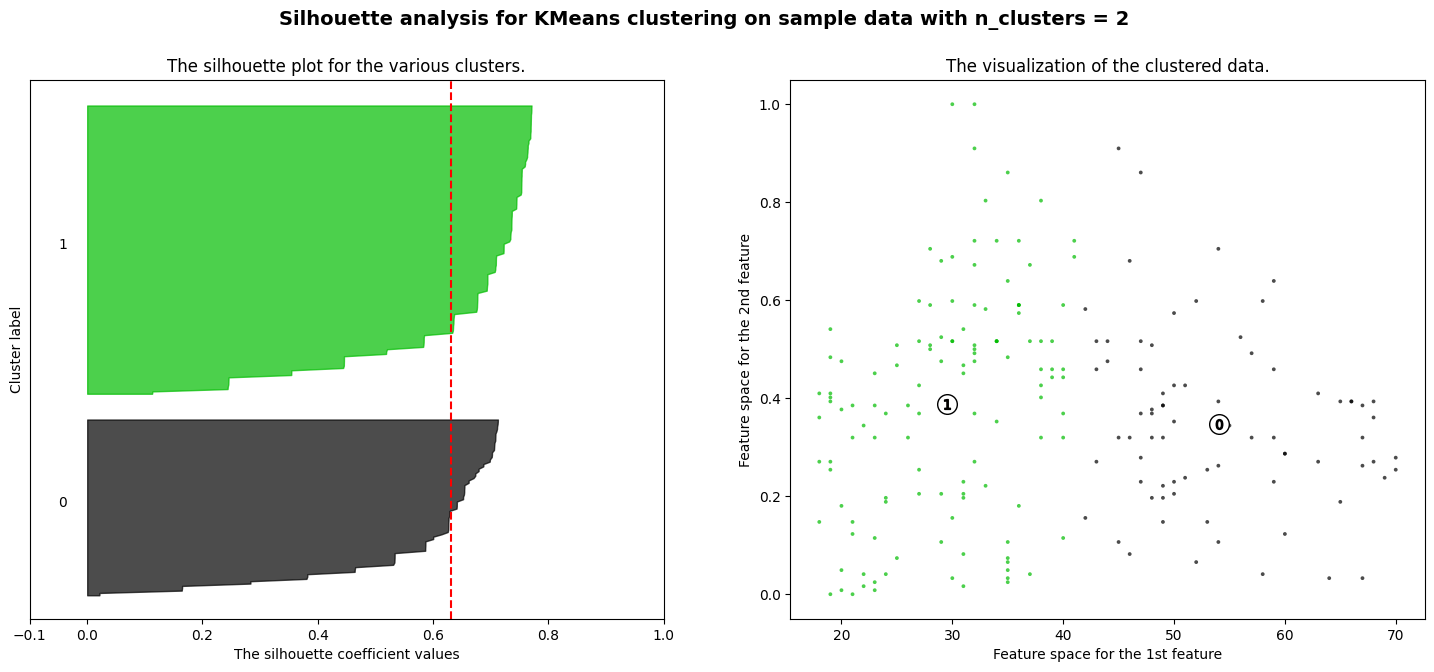

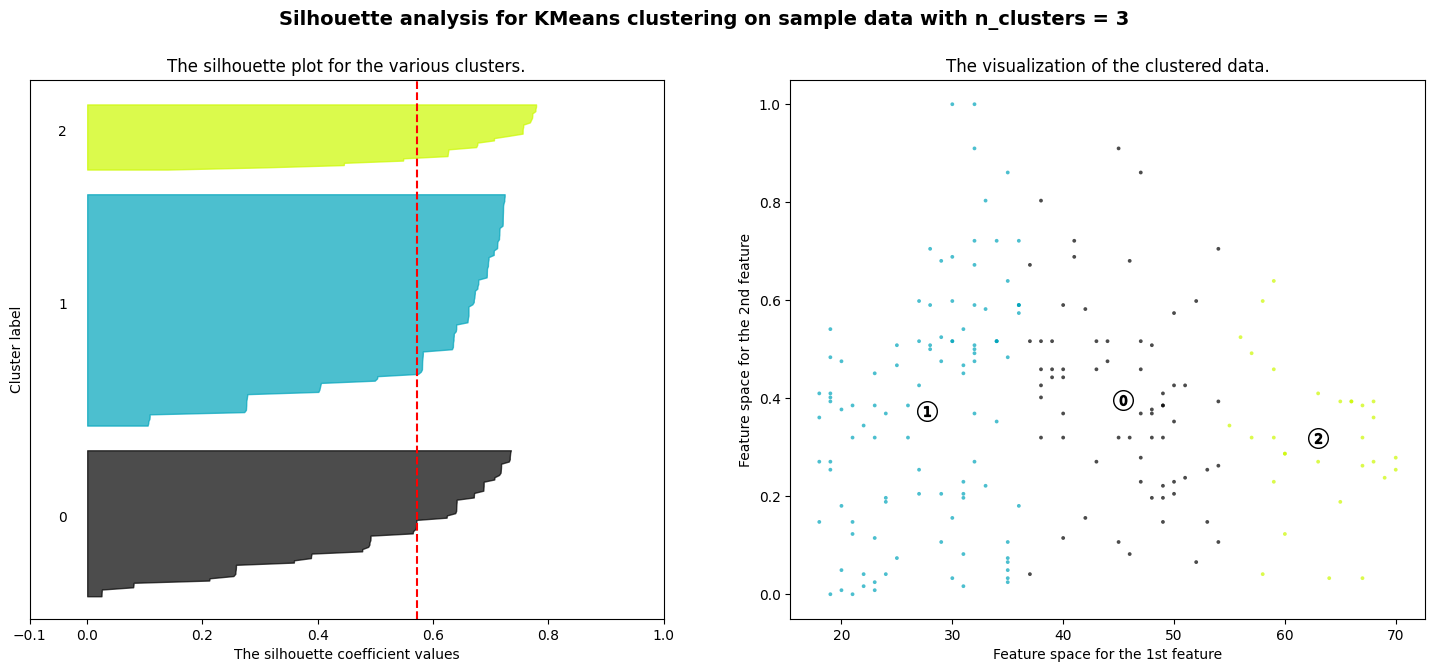

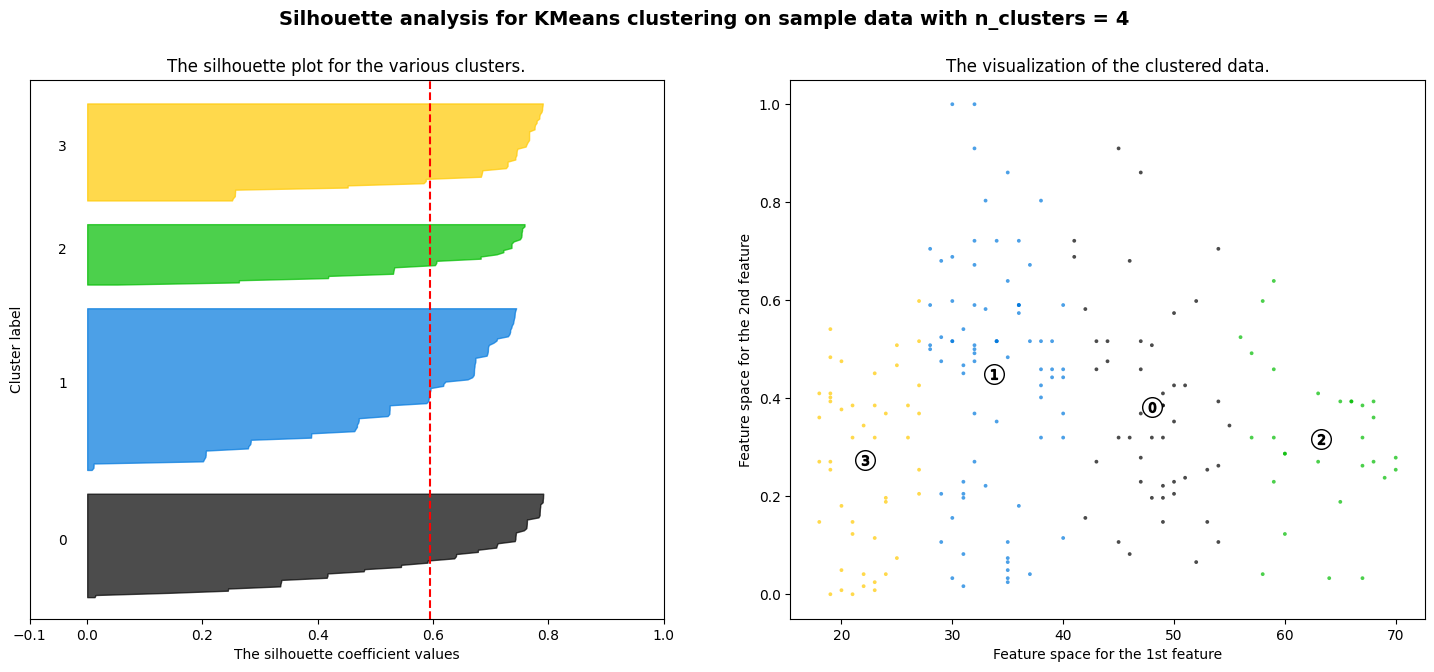

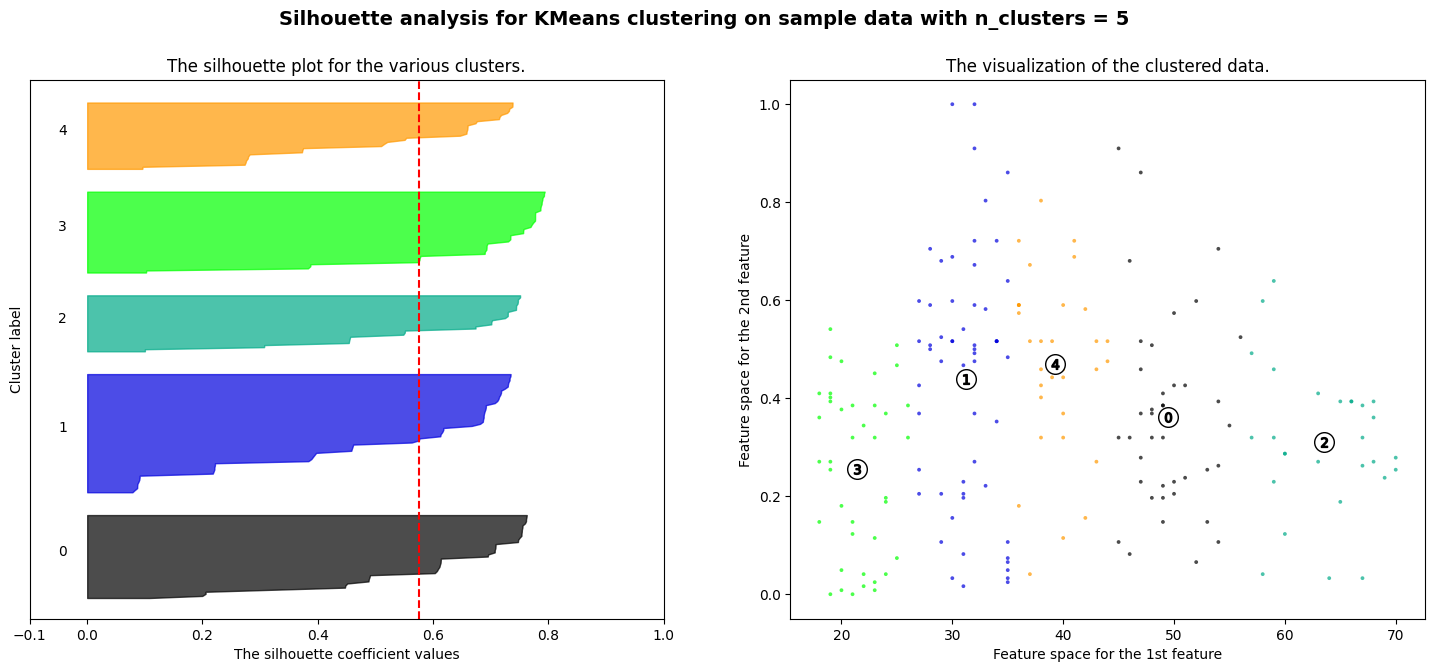

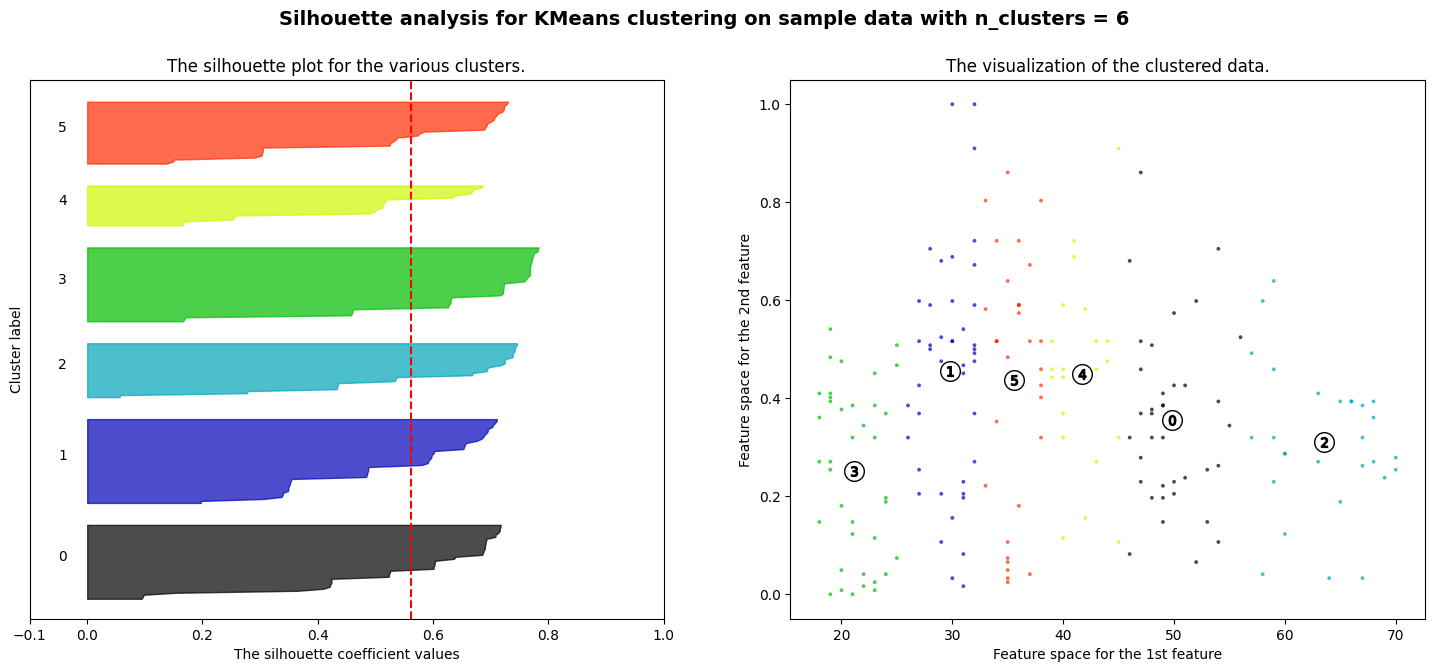

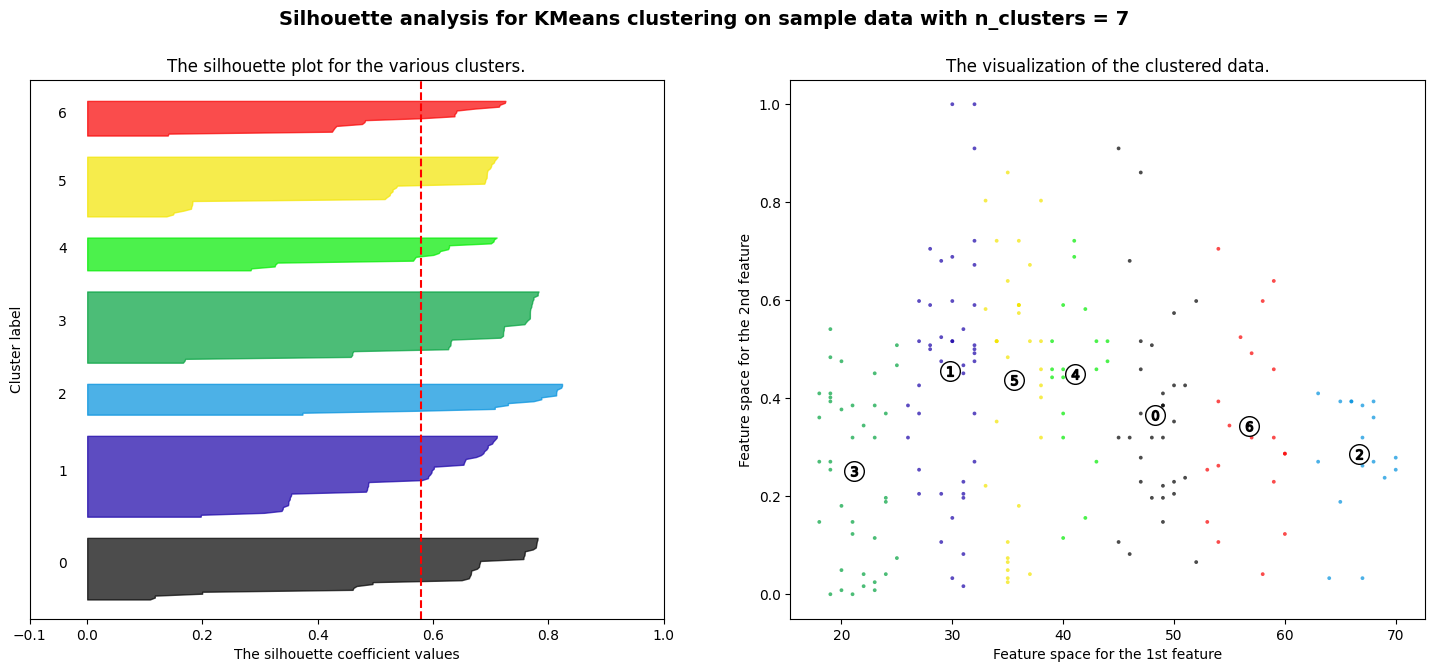

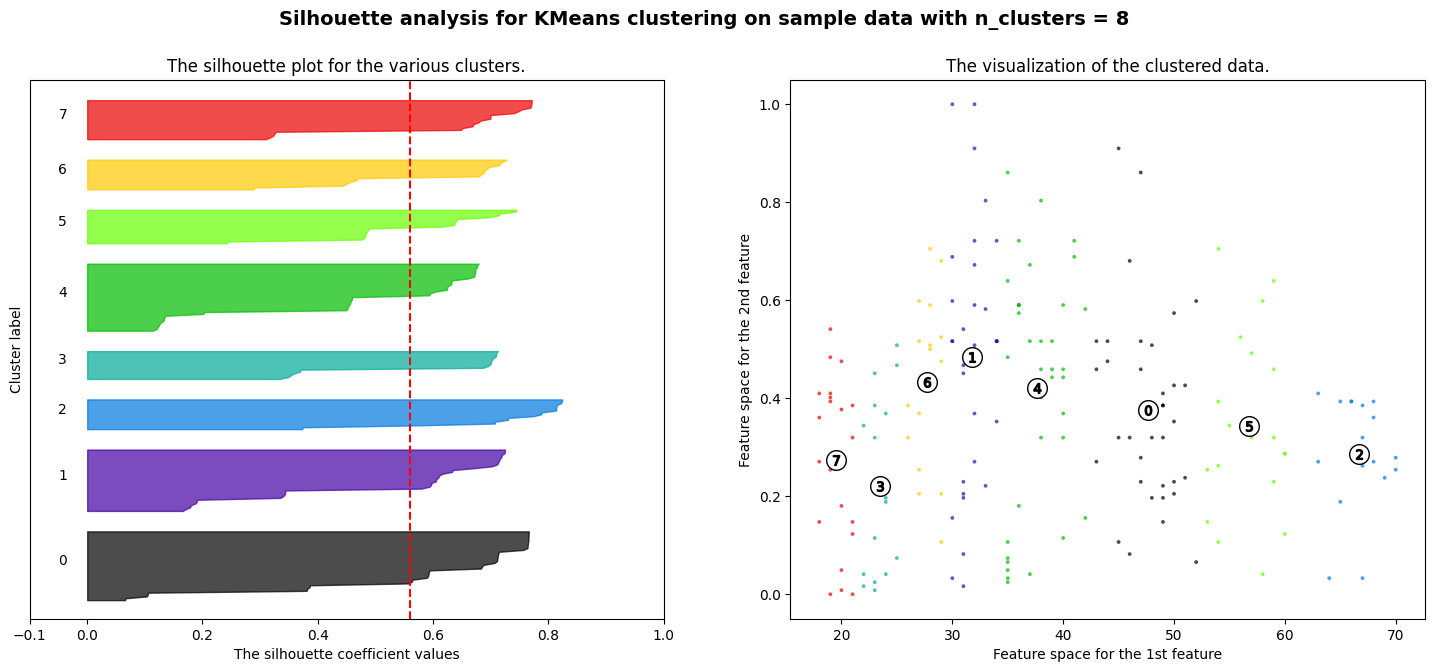

In [21]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

# Convert DataFrame to NumPy array
data1_array = data1.to_numpy()

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(data1_array) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data1_array)

    # The silhouette_score gives the average value for all the samples
    silhouette_avg = silhouette_score(data1_array, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data1_array, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data1_array[:, 0], data1_array[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker="o", c="white", alpha=1, s=200, edgecolor="k")

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker=f"${i}$", alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(f"Silhouette analysis for KMeans clustering on sample data with n_clusters = {n_clusters}",
                 fontsize=14, fontweight="bold")

plt.show()
